# Caudas Pesadas

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [ ]:
symbols = ['MSFT', 'GOOGL', 'TSLA', 'AMZN', 'AAPL', 'META', 'NVDA']

start_date = '2015-01-01'
end_date = '2023-11-22'


data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%%**********************]  7 of 7 completed


In [ ]:
data_adj_close = data.iloc[:, data.columns.get_level_values(0)=='Adj Close']
data_adj_close.columns = data_adj_close.columns.droplevel()
data_adj_close

,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2015-01-02,24.466448,15.426000,26.477501,78.449997,40.452740,4.832804,14.620667
2015-01-05,23.777193,15.109500,25.973000,77.190002,40.080761,4.751178,14.006000
2015-01-06,23.779432,14.764500,25.332001,76.150002,39.492470,4.607130,14.085333
2015-01-07,24.112869,14.921000,25.257500,76.150002,39.994228,4.595127,14.063333
2015-01-08,25.039341,15.023000,25.345501,78.180000,41.170788,4.767983,14.041333
...,...,...,...,...,...,...,...
2023-11-15,188.009995,143.199997,134.619995,332.709991,369.670013,488.837036,242.839996
2023-11-16,189.710007,142.830002,136.929993,334.190002,376.170013,494.756500,233.589996
2023-11-17,189.690002,145.179993,135.309998,335.040009,369.850006,492.936676,234.300003


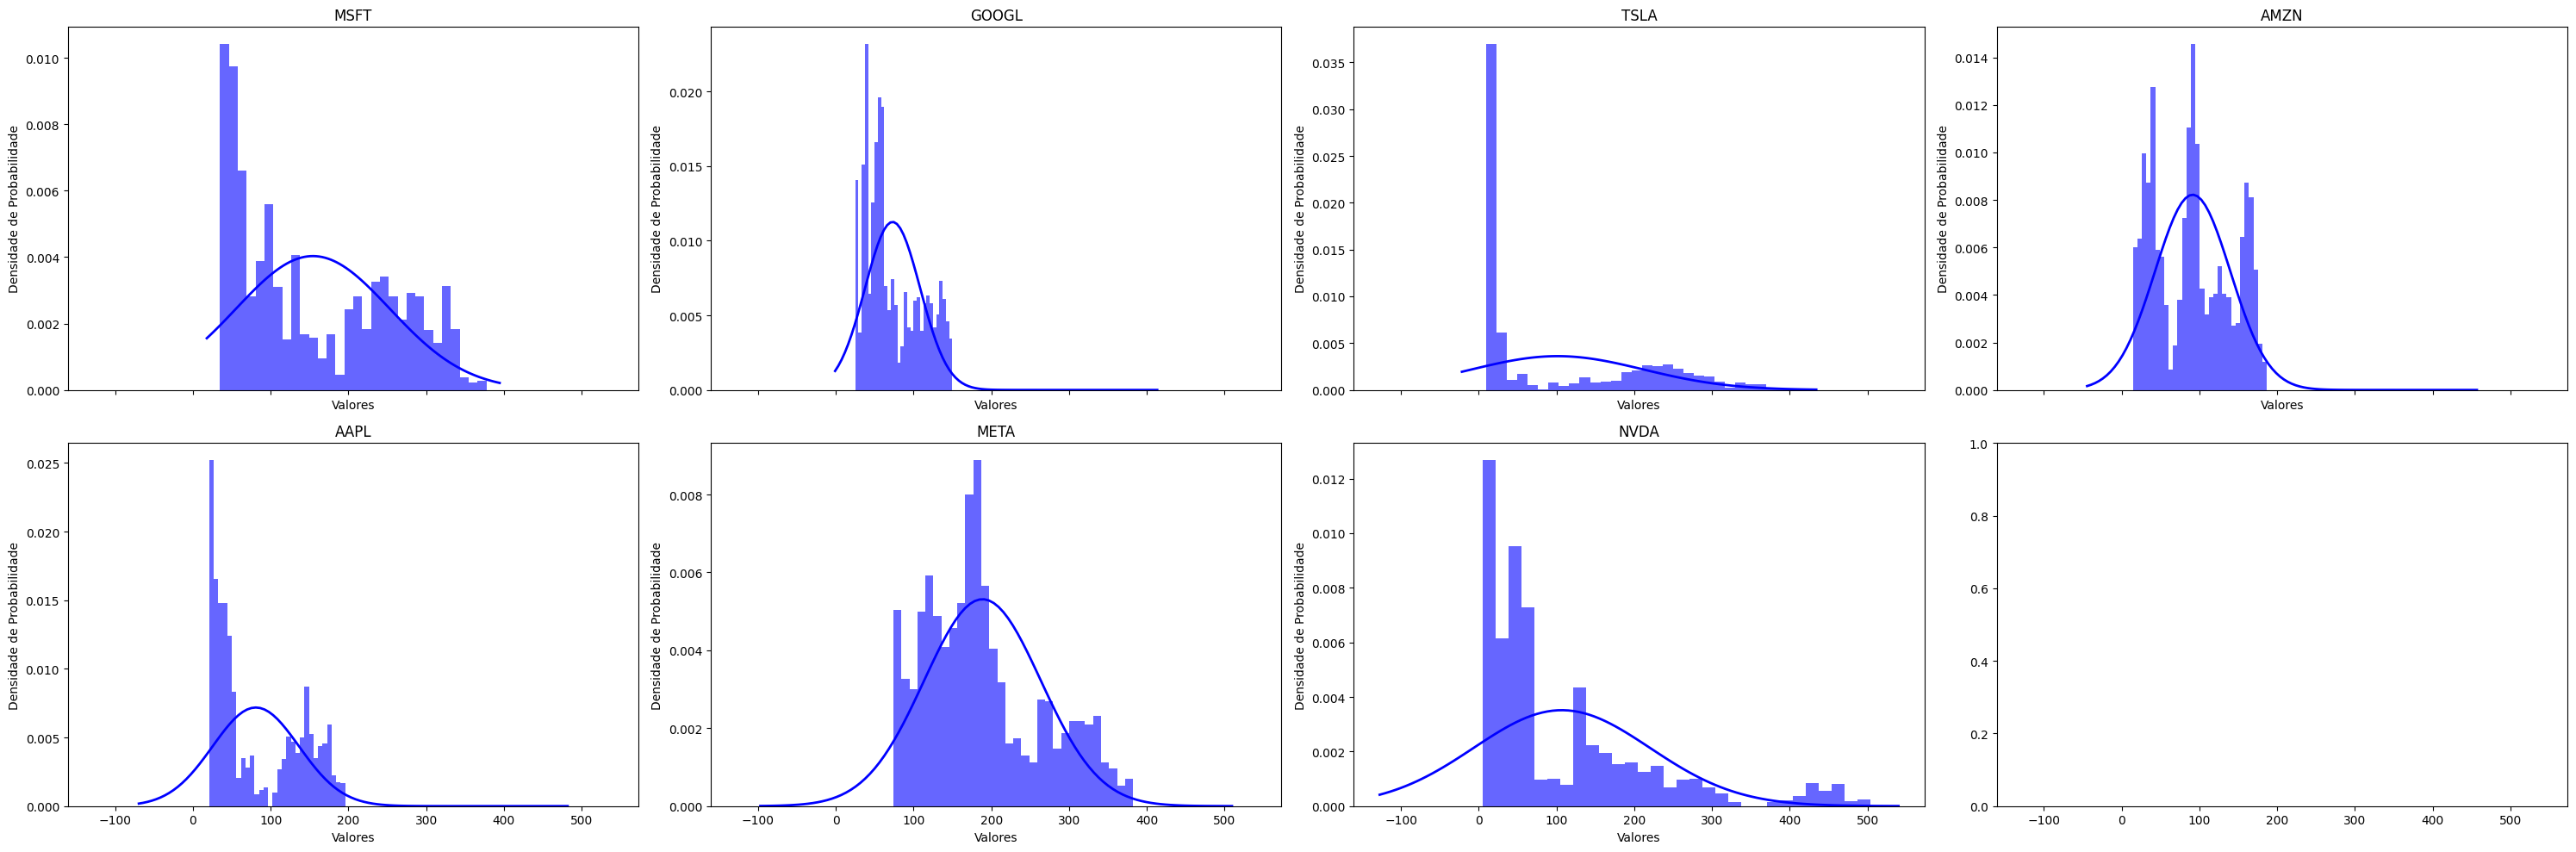

In [ ]:
symbols = ['MSFT', 'GOOGL', 'TSLA', 'AMZN', 'AAPL', 'META', 'NVDA']

fig, axes = plt.subplots(ncols=4, nrows=2, sharex=True, figsize=(30,10))

axes = axes.flatten()

for i, symbol in enumerate(symbols):
    ax = axes[i]

    ax.hist(data_adj_close[symbol], bins=30, density=True, color='b', alpha=0.6)

    media, desvio_padrao = np.mean(data_adj_close[symbol]), np.std(data_adj_close[symbol])


    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)


    p = norm.pdf(x, media, desvio_padrao)
    ax.plot(x, p, 'b', linewidth=2)

    ax.set_title(symbol)
    ax.set_xlabel('Valores')
    ax.set_ylabel('Densidade de Probabilidade')

plt.tight_layout()
plt.show()

## Conclusões

* Comparando os histogramas com a distribuição normal, não é possível dizer com clareza se possuem caudas pesadas ou leves.
* Ter caudas pesadas indica que há maior probabilidade de ter preços baixos ou altos em relação a uma distribuição normal.
* Caudas pesadas podem ser originadas de:

  1. Eventos extremos
  2. Comportamento dos investidores.
  3. Assimetria nas informações.
  4. Natureza não linear dos mercados.
  5. Modelos de volatilidade estocástica para precificar ações.
* É interessante analisar a Kurtosis e verificar se a mesma é maior que a de uma distribuição normal (kurtosis = 0).

In [ ]:
symbols = ['MSFT', 'GOOGL', 'TSLA', 'AMZN', 'AAPL', 'META', 'NVDA']

for symbol in symbols:
  print(f"{symbol}: {data_adj_close[symbol].kurtosis()}")

MSFT: -1.2483596694861516
GOOGL: -0.913623562421479
TSLA: -0.7862562022667734
AMZN: -1.167329354635952
AAPL: -1.3096156851240535
META: -0.45231741064566755
NVDA: 1.9752213649708894


## Índice de Kurtosis

* k = 0 : igual a distribuição normal.
* k > 0 : caudas mais pesadas que a distribuição normal.
* k < 0: caudas mais leves que a distribuição normal.

## Conclusões:

* Vemos que apenas a NVIDIA possue caudas pesadas (kurtosis > 0) na dsitribuição de probabilidade do preço ajustado de suas ações.
* Caudas leves podem indicar:
* Demais ações indicam caudas leves

  1. Estabilidade de mercado.
  2. Eficiência de mercado.
  3. Atividade de negociação equilibrada.

* Portanto, caudas leves indiciam menor volatilidade no preço das ações.